Pipeline of our model:
<br><img src="plots/demo.png" width="500"><br>

In [1]:
import numpy as np
from IPython.display import SVG, display

import sys
sys.path.append('/home/enes/bim/')# you should have this package on the sys.path

from utils import segsites_to_trees

In [2]:
from Bimbalance import bSFS, bTree

In [3]:
# genotype matrix:
GM = np.array([[1, 0, 0, 1, 1, 1, 0],
               [1, 0, 0, 1, 1, 1, 1],
               [1, 0, 0, 1, 1, 0, 0],
               [0, 1, 1, 1, 0, 0, 0],
               [0, 1, 0, 0, 0, 0, 0]]).T
# 7 sites for 5 individuals
N = GM.shape[1]
L = GM.shape[0]

## Method 1: Infer  $\beta$-splitting by SFS

In [4]:
bsfs = bSFS(N, rho1 = 0.01, rho2 = 0.01) # load the object for penalized MLE

In [5]:
sfs = bsfs.segsites_to_SFS(GM) # Genotype Matrix -> sfs
betasfs_out = bsfs.predict(sfs) # this is where the optimization happens

In [6]:
betasfs_out

     fun: 2.5188829689045167
     jac: array([-1.10539251e-05])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.70801823])

## Method 2: Infer  $\beta$-splitting by tree split sizes

In [7]:
inferred_ts = segsites_to_trees(GM) # infer trees from genotype matrix by tsinfer

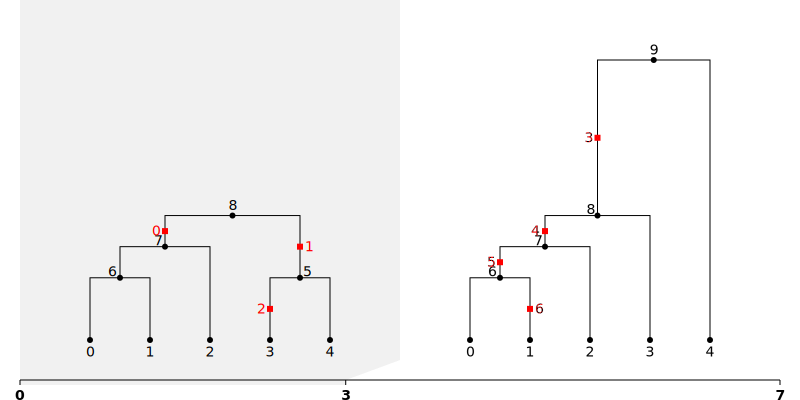

In [8]:
SVG(inferred_ts.draw_svg(size=(800, 400)))

In [9]:
btree = bTree(N, rho1 = 0.005, rho2 = 0.005) # load the object for penalized MLE

In [10]:
t = 0
for tree in inferred_ts.trees():
    print(tree.interval)
    out = btree.split_predict(tree) # this is where the optimization happens
    print(out)    
    left, right = tree.interval
    t += (right-left)*out.x[0]
    print(20*'--')
print('\nweighted avarage for the region is = ', t/inferred_ts.get_sequence_length())    

Interval(left=0.0, right=3.0)
     fun: 0.48701185253075774
     jac: array([1.09741211e-05])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.07565359])
----------------------------------------
Interval(left=3.0, right=7.0)
     fun: 0.7596626274584588
     jac: array([1.03469797e-05])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([-1.81183916])
----------------------------------------

weighted avarage for the region is =  -0.14577083689387774
